In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import sklearn as sk
%matplotlib inline



In [2]:
#1. PERFORM AN EXPLANATORY DATA ANALYSIS (EDA) WITH VISUALISATION

In [3]:
data = pd.read_csv('social_media_shares.csv')
print(data)

       tokens_title  tokens_content  unique_tokens  non_stop_words  \
0                12             219       0.663594             1.0   
1                 9             255       0.604743             1.0   
2                 9             211       0.575130             1.0   
3                 9             531       0.503788             1.0   
4                13            1072       0.415646             1.0   
...             ...             ...            ...             ...   
39639            11             346       0.529052             1.0   
39640            12             328       0.696296             1.0   
39641            10             442       0.516355             1.0   
39642             6             682       0.539493             1.0   
39643            10             157       0.701987             1.0   

       non_stop_unique_tokens  hrefs  self_refs  imgs  videos  token_length  \
0                    0.815385      4          2     1       0      4.680365   
1

In [4]:
print("Dataset head:")
data.head()

Dataset head:


,tokens_title,tokens_content,unique_tokens,non_stop_words,non_stop_unique_tokens,hrefs,self_refs,imgs,videos,token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
print("Dataset tail:")
data.tail()

Dataset tail:


,tokens_title,tokens_content,unique_tokens,non_stop_words,non_stop_unique_tokens,hrefs,self_refs,imgs,videos,token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,11,346,0.529052,1.0,0.684783,9,7,1,1,4.523121,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12,328,0.696296,1.0,0.885057,9,7,3,48,4.405488,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10,442,0.516355,1.0,0.644128,24,1,12,1,5.076923,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6,682,0.539493,1.0,0.692661,10,1,1,0,4.975073,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,10,157,0.701987,1.0,0.846154,1,1,0,2,4.471338,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [6]:
print("Dataset shape:")
data.shape

Dataset shape:


(39644, 59)

In [7]:
print("Dataset described:")
data.describe()

Dataset described:


,tokens_title,tokens_content,unique_tokens,non_stop_words,non_stop_unique_tokens,hrefs,self_refs,imgs,videos,token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [8]:
print("Dataset info:")
data.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tokens_title                  39644 non-null  int64  
 1   tokens_content                39644 non-null  int64  
 2   unique_tokens                 39644 non-null  float64
 3   non_stop_words                39644 non-null  float64
 4   non_stop_unique_tokens        39644 non-null  float64
 5   hrefs                         39644 non-null  int64  
 6   self_refs                     39644 non-null  int64  
 7   imgs                          39644 non-null  int64  
 8   videos                        39644 non-null  int64  
 9   token_length                  39644 non-null  float64
 10  keywords                      39644 non-null  int64  
 11  lifestyle                     39644 non-null  int64  
 12  entertainment                 39644 non-null  

In [9]:
print("Dataset correlation:")
data.corr()

Dataset correlation:


,tokens_title,tokens_content,unique_tokens,non_stop_words,non_stop_unique_tokens,hrefs,self_refs,imgs,videos,token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
tokens_title,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
tokens_content,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
unique_tokens,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
non_stop_words,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
non_stop_unique_tokens,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
hrefs,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,0.222588,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
self_refs,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,0.126879,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
imgs,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,0.033924,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
videos,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,-0.002940,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936
token_length,-0.071403,0.167789,0.026407,0.031554,0.034185,0.222588,0.126879,0.033924,-0.002940,1.000000,...,0.222207,0.471383,-0.324529,-0.278784,-0.194660,-0.040406,-0.016718,0.026586,-0.036953,-0.022007


In [10]:
# Get the independent variable: all the column but the last one
X = data.iloc[:, :-1].values
# Get the dependent variable: the last column (labelled with the index '-1' - which means "the last one") 
y = data.iloc[:, -1].values 

In [11]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:] # take all columns from 1 on (drop first column)

In [12]:
#2. GENERATE A TRAINING AND TEST SET.

In [128]:
from sklearn.model_selection import train_test_split
#splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
print("Train set shape X: ", X_train.shape)
print("Test set shape:", X_test.shape)
print("Train set shape y: ", y_train.shape)
print("Test set shape y: ", y_test.shape)

Train set shape X:  (31715, 57)
Test set shape: (7929, 57)
Train set shape y:  (31715,)
Test set shape y:  (7929,)


In [14]:
#3. PREPROCESS THE DATASET

In [15]:
#a. Encoding categorical features already done

In [16]:
#b. Standardscaling of numerical features (or both features) + columntransformer??
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [17]:
#delete irrelevant variables 
# we deleted every vartiable with an accuracy < 0.025

In [18]:
A= spearmanr(data['shares'], data['tokens_title'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['tokens_title']

else:
    print ('good accuracy')

Accuracy:
-0.040278201936068875
good accuracy


In [19]:
A= spearmanr(data['shares'], data['tokens_content'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['tokens_content']

else:
    print ('good accuracy')

Accuracy:
0.009675150963278633
deleted


In [20]:
A= spearmanr(data['shares'], data['unique_tokens'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['unique_tokens']

else:
    print ('good accuracy')

Accuracy:
-0.04484214621000632
good accuracy


In [21]:
A= spearmanr(data['shares'], data['non_stop_words'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['non_stop_words']

else:
    print ('good accuracy')

Accuracy:
0.009646258574607174
deleted


In [22]:
A= spearmanr(data['shares'], data['non_stop_unique_tokens'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['non_stop_unique_tokens']

else:
    print ('good accuracy')

Accuracy:
-0.07070573858757861
good accuracy


In [23]:
A= spearmanr(data['shares'], data['hrefs'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['hrefs']

else:
    print ('good accuracy')

Accuracy:
0.09001508876856178
good accuracy


In [24]:
A= spearmanr(data['shares'], data['self_refs'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['self_refs']

else:
    print ('good accuracy')

Accuracy:
0.03750254041793133
good accuracy


In [25]:
A= spearmanr(data['shares'], data['imgs'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['imgs']

else:
    print ('good accuracy')

Accuracy:
0.0831142953944779
good accuracy


In [26]:
A= spearmanr(data['shares'], data['videos'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['videos']

else:
    print ('good accuracy')

Accuracy:
0.0485106940385724
good accuracy


In [27]:
A= spearmanr(data['shares'], data['token_length'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['token_length']

else:
    print ('good accuracy')

Accuracy:
-0.057334649730445615
good accuracy


In [28]:
A= spearmanr(data['shares'], data['keywords'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['keywords']

else:
    print ('good accuracy')

Accuracy:
0.07125251234991725
good accuracy


In [29]:
A= spearmanr(data['shares'], data['lifestyle'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['lifestyle']

else:
    print ('good accuracy')

Accuracy:
0.04254686518826444
good accuracy


In [30]:
A= spearmanr(data['shares'], data['entertainment'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['entertainment']

else:
    print ('good accuracy')

Accuracy:
-0.11469108754196645
good accuracy


In [31]:
A= spearmanr(data['shares'], data['bus'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['bus']

else:
    print ('good accuracy')

Accuracy:
-0.01831066006843896
deleted


In [32]:
A= spearmanr(data['shares'], data['socmed'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['socmed']

else:
    print ('good accuracy')

Accuracy:
0.11357153721975083
good accuracy


In [33]:
A= spearmanr(data['shares'], data['tech'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    #del data['tech']

else:
    print ('good accuracy')

Accuracy:
0.09451944938462849
good accuracy


In [34]:
A= spearmanr(data['shares'], data['world'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['world']

else:
    print ('good accuracy')

Accuracy:
-0.16844126739673917
good accuracy


In [35]:
A= spearmanr(data['shares'], data['kw_min_min'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['kw_min_min']

else:
    print ('good accuracy')

Accuracy:
0.0030079487315342462
deleted


In [36]:
A= spearmanr(data['shares'], data['kw_max_min'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['kw_max_min']

else:
    print ('good accuracy')

Accuracy:
0.09155533472470014
good accuracy


In [37]:
A= spearmanr(data['shares'], data['kw_avg_min'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['kw_avg_min']

else:
    print ('good accuracy')

Accuracy:
0.09302652939380103
good accuracy


In [38]:
A= spearmanr(data['shares'], data['kw_min_max'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['kw_min_max']

else:
    print ('good accuracy')

Accuracy:
0.05740177964832881
good accuracy


In [39]:
A= spearmanr(data['shares'], data['kw_max_max'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['kw_max_max']

else:
    print ('good accuracy')

Accuracy:
-0.03051310554093011
good accuracy


In [40]:
A= spearmanr(data['shares'], data['kw_avg_max'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['kw_avg_max']

else:
    print ('good accuracy')

Accuracy:
0.0373145819731597
good accuracy


In [41]:
A= spearmanr(data['shares'], data['kw_min_avg'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    #del data['kw_min_avg']

else:
    print ('good accuracy')

Accuracy:
0.1032421386954209
good accuracy


In [42]:
A= spearmanr(data['shares'], data['kw_max_avg'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['kw_max_avg']

else:
    print ('good accuracy')

Accuracy:
0.2232914467087491
good accuracy


In [43]:
A= spearmanr(data['shares'], data['kw_avg_avg'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['kw_avg_avg']

else:
    print ('good accuracy')

Accuracy:
0.25562215091267954
good accuracy


In [44]:
A= spearmanr(data['shares'], data['self_reference_min_shares'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['self_reference_min_shares']

else:
    print ('good accuracy')

Accuracy:
0.1815167532308559
good accuracy


In [45]:
A= spearmanr(data['shares'], data['self_reference_max_shares'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['self_reference_max_shares']

else:
    print ('good accuracy')

Accuracy:
0.16872472036258646
good accuracy


In [46]:
A= spearmanr(data['shares'], data['self_reference_avg_shares'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['self_reference_avg_shares']

else:
    print ('good accuracy')

Accuracy:
0.19217449967544295
good accuracy


In [47]:
#want to keep all of the weekdays. Not sure if its smart to delete single days

In [48]:
A= spearmanr(data['shares'], data['monday'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.01: 
    print('deleted')
    del data['monday']

else:
    print ('good accuracy')

Accuracy:
-0.019637722487687595
good accuracy


In [49]:
A= spearmanr(data['shares'], data['tuesday'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['tuesday']

else:
    print ('good accuracy')

Accuracy:
-0.04105100667262618
good accuracy


In [50]:
A= spearmanr(data['shares'], data['wednesday'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['wednesday']

else:
    print ('good accuracy')

Accuracy:
-0.048130646240380826
good accuracy


In [51]:
A= spearmanr(data['shares'], data['thursday'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['thursday']

else:
    print ('good accuracy')

Accuracy:
-0.033896614406916444
good accuracy


In [52]:
A= spearmanr(data['shares'], data['friday'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.01: 
    print('deleted')
    del data['friday']

else:
    print ('good accuracy')

Accuracy:
0.011560311959661415
good accuracy


In [53]:
A= spearmanr(data['shares'], data['saturday'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['saturday']

else:
    print ('good accuracy')

Accuracy:
0.10885956690499632
good accuracy


In [54]:
A= spearmanr(data['shares'], data['sunday'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['sunday']

else:
    print ('good accuracy')

Accuracy:
0.0984058157123426
good accuracy


In [55]:
A= spearmanr(data['shares'], data['is_weekend'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['is_weekend']

else:
    print ('good accuracy')

Accuracy:
0.15171750897797764
good accuracy


In [56]:
A= spearmanr(data['shares'], data['saturday'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['saturday']

else:
    print ('good accuracy')

Accuracy:
0.10885956690499632
good accuracy


In [57]:
A= spearmanr(data['shares'], data['LDA_00'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['LDA_00']

else:
    print ('good accuracy')

Accuracy:
0.021143115816948197
deleted


In [58]:
A= spearmanr(data['shares'], data['LDA_01'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['LDA_01']

else:
    print ('good accuracy')

Accuracy:
-0.06876044954975052
good accuracy


In [59]:
A= spearmanr(data['shares'], data['LDA_02'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['LDA_02']

else:
    print ('good accuracy')

Accuracy:
-0.1571786196754083
good accuracy


In [60]:
A= spearmanr(data['shares'], data['LDA_03'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['LDA_03']

else:
    print ('good accuracy')

Accuracy:
0.06768824562399914
good accuracy


In [61]:
A= spearmanr(data['shares'], data['LDA_04'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['LDA_04']

else:
    print ('good accuracy')

Accuracy:
0.051308664785183825
good accuracy


In [62]:
A= spearmanr(data['shares'], data['subjectivity'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['subjectivity']

else:
    print ('good accuracy')

Accuracy:
0.11354818449921905
good accuracy


In [63]:
A= spearmanr(data['shares'], data['sentiment_polarity'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['sentiment_polarity']

else:
    print ('good accuracy')

Accuracy:
0.07955140622514555
good accuracy


In [64]:
A= spearmanr(data['shares'], data['global_rate_positive_words'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['global_rate_positive_words']

else:
    print ('good accuracy')

Accuracy:
0.07129598578552794
good accuracy


In [65]:
A= spearmanr(data['shares'], data['avg_positive_polarity'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['avg_positive_polarity']

else:
    print ('good accuracy')

Accuracy:
0.052707843582328474
good accuracy


In [66]:
A= spearmanr(data['shares'], data['min_positive_polarity'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['min_positive_polarity']

else:
    print ('good accuracy')

Accuracy:
-0.045270270690985534
good accuracy


In [67]:
A= spearmanr(data['shares'], data['max_positive_polarity'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['max_positive_polarity']

else:
    print ('good accuracy')

Accuracy:
0.05665306406155162
good accuracy


In [68]:
A= spearmanr(data['shares'], data['avg_negative_polarity'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['avg_negative_polarity']

else:
    print ('good accuracy')

Accuracy:
-0.018079516270125738
deleted


In [69]:
A= spearmanr(data['shares'], data['min_negative_polarity'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['min_negative_polarity']

else:
    print ('good accuracy')

Accuracy:
-0.015637227483660508
deleted


In [70]:
A= spearmanr(data['shares'], data['max_negative_polarity'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['max_negative_polarity']

else:
    print ('good accuracy')

Accuracy:
-0.0019745108164129664
deleted


In [71]:
A= spearmanr(data['shares'], data['title_subjectivity'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['title_subjectivity']

else:
    print ('good accuracy')

Accuracy:
0.040805262482069476
good accuracy


In [72]:
A= spearmanr(data['shares'], data['title_sentiment_polarity'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['title_sentiment_polarity']

else:
    print ('good accuracy')

Accuracy:
0.05686829960812396
good accuracy


In [73]:
A= spearmanr(data['shares'], data['abs_title_sentiment_polarity'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['abs_title_sentiment_polarity']

else:
    print ('good accuracy')

Accuracy:
0.03716597928723541
good accuracy


In [74]:
A= spearmanr(data['shares'], data['abs_title_subjectivity'])[0]
print('Accuracy:')
print(A)
if abs(A) < 0.025: 
    print('deleted')
    del data['abs_title_subjectivity']

else:
    print ('good accuracy')

Accuracy:
-0.0007970066459451069
deleted


In [75]:
data.shape

(39644, 50)

In [76]:
#c. Removing outliers

<AxesSubplot:>

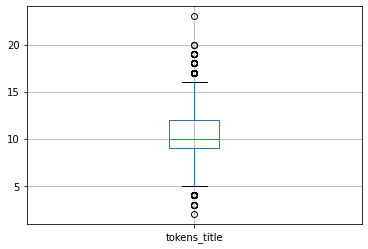

In [77]:
data.boxplot('tokens_title')

In [78]:
#deciding on what values are the outliers
for X_train in ['tokens_title']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 #estimating upper bound and lower bound
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)
 
 #replacing ourliers as null values
    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [79]:
#Doing this for all independent variables seperately.
#We do not code all the boxplots anymore.
#We immediately start detecting outliers and assign them as null value.

In [80]:
for X_train in ['unique_tokens']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [81]:
for X_train in ['non_stop_unique_tokens']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [82]:
for X_train in ['hrefs']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [83]:
for X_train in ['self_refs']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [84]:
for X_train in ['imgs']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [85]:
for X_train in ['videos']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [86]:
for X_train in ['token_length']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [87]:
for X_train in ['keywords']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [88]:
for X_train in ['lifestyle']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [89]:
for X_train in ['entertainment']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [90]:
for X_train in ['socmed']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [91]:
for X_train in ['tech']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [92]:
for X_train in ['world']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [93]:
for X_train in ['kw_max_min']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [94]:
for X_train in ['kw_avg_min']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [95]:
for X_train in ['kw_min_max']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [96]:
for X_train in ['kw_max_max']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [97]:
for X_train in ['kw_avg_max']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [98]:
for X_train in ['kw_min_avg']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [99]:
for X_train in ['kw_max_avg']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [100]:
for X_train in ['kw_avg_avg']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [101]:
for X_train in ['self_reference_min_shares']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [102]:
for X_train in ['self_reference_max_shares']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [103]:
for X_train in ['self_reference_avg_shares']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [104]:
for X_train in ['LDA_01']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [105]:
for X_train in ['LDA_02']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [106]:
for X_train in ['LDA_03']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [107]:
for X_train in ['LDA_04']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [108]:
for X_train in ['subjectivity']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [109]:
for X_train in ['sentiment_polarity']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [110]:
for X_train in ['global_rate_positive_words']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [111]:
for X_train in ['global_rate_negative_words']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [112]:
for X_train in ['rate_positive_words']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [113]:
for X_train in ['rate_negative_words']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [114]:
for X_train in ['avg_positive_polarity']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [115]:
for X_train in ['min_positive_polarity']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [116]:
for X_train in ['max_positive_polarity']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [117]:
for X_train in ['title_subjectivity']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [118]:
for X_train in ['title_sentiment_polarity']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [119]:
for X_train in ['abs_title_sentiment_polarity']:
    q97,q3 = np.percentile(data.loc[:,X_train],[97,3])
    intr_qr = q97-q3
 
 
    max = q97+(1.5*intr_qr)
    min = q3-(1.5*intr_qr)

    data.loc[data[X_train] < min,X_train] = np.nan
    data.loc[data[X_train] > max,X_train] = np.nan

In [120]:
#the sum of null values or missing values
data.isnull().sum()

tokens_title                       0
unique_tokens                      1
non_stop_unique_tokens             1
hrefs                             71
self_refs                        184
imgs                              70
videos                           105
token_length                    1184
keywords                           0
lifestyle                          0
entertainment                      0
socmed                             0
tech                               0
world                              0
kw_max_min                       393
kw_avg_min                       258
kw_min_max                       469
kw_max_max                         0
kw_avg_max                         0
kw_min_avg                         0
kw_max_avg                       282
kw_avg_avg                        81
self_reference_min_shares        423
self_reference_max_shares        256
self_reference_avg_shares        318
monday                             0
tuesday                            0
w

In [121]:
#drop the null values:
data = data.dropna(axis=0)

In [122]:
#checking if there are indeed no presence of the null values anymore:
data.isnull().sum()

tokens_title                    0
unique_tokens                   0
non_stop_unique_tokens          0
hrefs                           0
self_refs                       0
imgs                            0
videos                          0
token_length                    0
keywords                        0
lifestyle                       0
entertainment                   0
socmed                          0
tech                            0
world                           0
kw_max_min                      0
kw_avg_min                      0
kw_min_max                      0
kw_max_max                      0
kw_avg_max                      0
kw_min_avg                      0
kw_max_avg                      0
kw_avg_avg                      0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_shares       0
monday                          0
tuesday                         0
wednesday                       0
thursday                        0
friday        

In [123]:
#Shape of the final dataset that is used for the analysis
print(data.shape) # why still 39000 in total in test set + train set??????????????????
print(y_train.shape)
print(y_test.shape)


(36497, 50)
(31715,)
(7929,)


In [124]:
#4. TEST AT LEAST 3 DIFFERENT REGRESSORS

In [126]:
# K fold cross validation:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from numpy import mean
from numpy import absolute
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error


In [129]:
#linear regression cross validation
score = cross_val_score(linear_model.LinearRegression(), X_train, y_train, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1)

mean(absolute(score))


3025.002974308526

In [131]:
#Decisiontree cross validation
score = cross_val_score(tree.DecisionTreeRegressor(), X_train, y_train, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1)

mean(absolute(score))

4220.517641494562

In [132]:
#logistic regression cross validation -> lowest error so we should chose this regressor
score = cross_val_score(linear_model.LogisticRegression(), X_train, y_train, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1)

mean(absolute(score))

c:\Users\ACER\anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


2470.5480372063694

In [133]:
#random forrest cross validation
score = cross_val_score(ensemble.RandomForestRegressor(), X_train, y_train, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1)

mean(absolute(score))

3363.6542008513325

In [134]:
# metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
clf_model = LogisticRegression()
clf_model.fit(X_train, y_train)
y_pred = clf_model.predict(X_test)
print("Accuracy: ", r2_score(y_test, y_pred))

Accuracy:  -0.03238126541711184


c:\Users\ACER\anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# accuracy still not good enough

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
clf_model = LinearRegression()
clf_model.fit(X_train, y_train)
y_pred = clf_model.predict(X_test)
print("Accuracy: ", r2_score(y_test, y_pred))

Accuracy:  0.013624695943616705


In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
clf_model = RandomForestRegressor()
clf_model.fit(X_train, y_train)
y_pred = clf_model.predict(X_test)
print("Accuracy: ", r2_score(y_test, y_pred))

Accuracy:  -0.022672206501842096


In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
param_grid = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.1,1, 10, 100]}
classifier = SVC()

In [159]:
clf = GridSearchCV(classifier, param_grid)
clf.fit(X_train,y_train)

c:\Users\ACER\anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [ ]:
sorted(clf.cv_results_.keys())
#results are stored in this object

In [ ]:
clf.best_params_
#this contains the best parameters (i.e. best avg. score)

In [ ]:
y_pred = clf.best_estimator_.predict(X_test) # this contains the best trained classifier
print(classification_report(y_test, y_pred))

In [149]:
#subset -> to archieve a higher accuracy
data[['tech','kw_max_min','kw_avg_min','kw_min_avg','kw_max_avg','hrefs','self_refs','imgs','videos','keywords','lifestyle','socmed']]
data_subset=data[[ 'tech','kw_max_min','kw_avg_min','kw_min_avg','kw_max_avg','hrefs','self_refs','imgs','videos','keywords','lifestyle','socmed']]
data_subset.head()

,tech,kw_max_min,kw_avg_min,kw_min_avg,kw_max_avg,hrefs,self_refs,imgs,videos,keywords,lifestyle,socmed
0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,5.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,4.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,6.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,7.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,19.0,19.0,20.0,0.0,7.0,0.0,0.0


In [150]:
#linear regression
X = data.iloc[:,:-1]  
y = data.iloc[:,-1]

In [151]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [152]:
from sklearn.linear_model import LinearRegression # LinearRegression class
regressor = LinearRegression() # Create object of LinearRegression class
regressor.fit(X_train, y_train)

LinearRegression()

In [155]:
coeff = regressor.coef_ #get the coefficients
r_sq = regressor.score(X_test, y_test)
print("Coefficients:")
display(coeff)
print("R^2 on the test set:")
display(r_sq)

Coefficients:


array([ 7.86761817e+01, -3.17903876e+02,  1.17870345e+03,  2.58349624e+01,
       -4.96180423e+01,  2.15522364e+01,  2.53899737e+01, -3.14863369e+02,
       -5.21018353e+01, -8.44757436e+02, -9.36089978e+02, -2.74043796e+02,
       -3.57386015e+02, -2.24532968e+02,  4.14634819e-01, -1.21530583e+00,
       -6.81514460e-03, -1.72521938e-03, -1.65190413e-03, -4.08799162e-01,
       -1.04205569e-01,  1.69319181e+00, -1.03683042e-02, -1.62337572e-03,
        9.60104139e-02,  3.39010247e+02, -1.40618794e+02, -9.35533274e+01,
       -2.78625289e+02, -2.27580355e+02,  4.90631985e+02, -8.92644661e+01,
        4.01367518e+02,  1.36915803e+02, -3.77786188e+02,  2.14059281e+02,
        2.85346843e+02,  2.40214117e+03,  7.19354392e+02, -9.43324156e+03,
        2.44466687e+03,  2.88196940e+03,  3.05561986e+03, -1.88049006e+03,
       -2.52227172e+03,  6.44405229e+02, -5.85921846e+02, -2.07465487e+02,
        1.08780137e+03])

R^2 on the test set:


0.022838281461077914

In [ ]:
#accuracy is higher but still not good enough to use it for a prediction of the shares